In [10]:
# -*- coding: utf-8 -*-
%pylab inline

import unidecode
import pandas as pd
import copy

from results4letters import *

methods = [dicho_freq, letter_dicho_freq, letter_ejasint_freq, letter_clignement_freq, letter_keyboard_freq, letter_sep1_freq, letter_sep2_freq]

Populating the interactive namespace from numpy and matplotlib


In [11]:
# resolution
res = 50
N = 0

xlabel = ""
ylabel = "Taux de reussite"
title = ''
label_size = 20
xticks_size = 20
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    


font = {'family' : 'normal',
#    'weight' : 'normal',
    'size'   : 18}

matplotlib.rc('font', **font)
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)


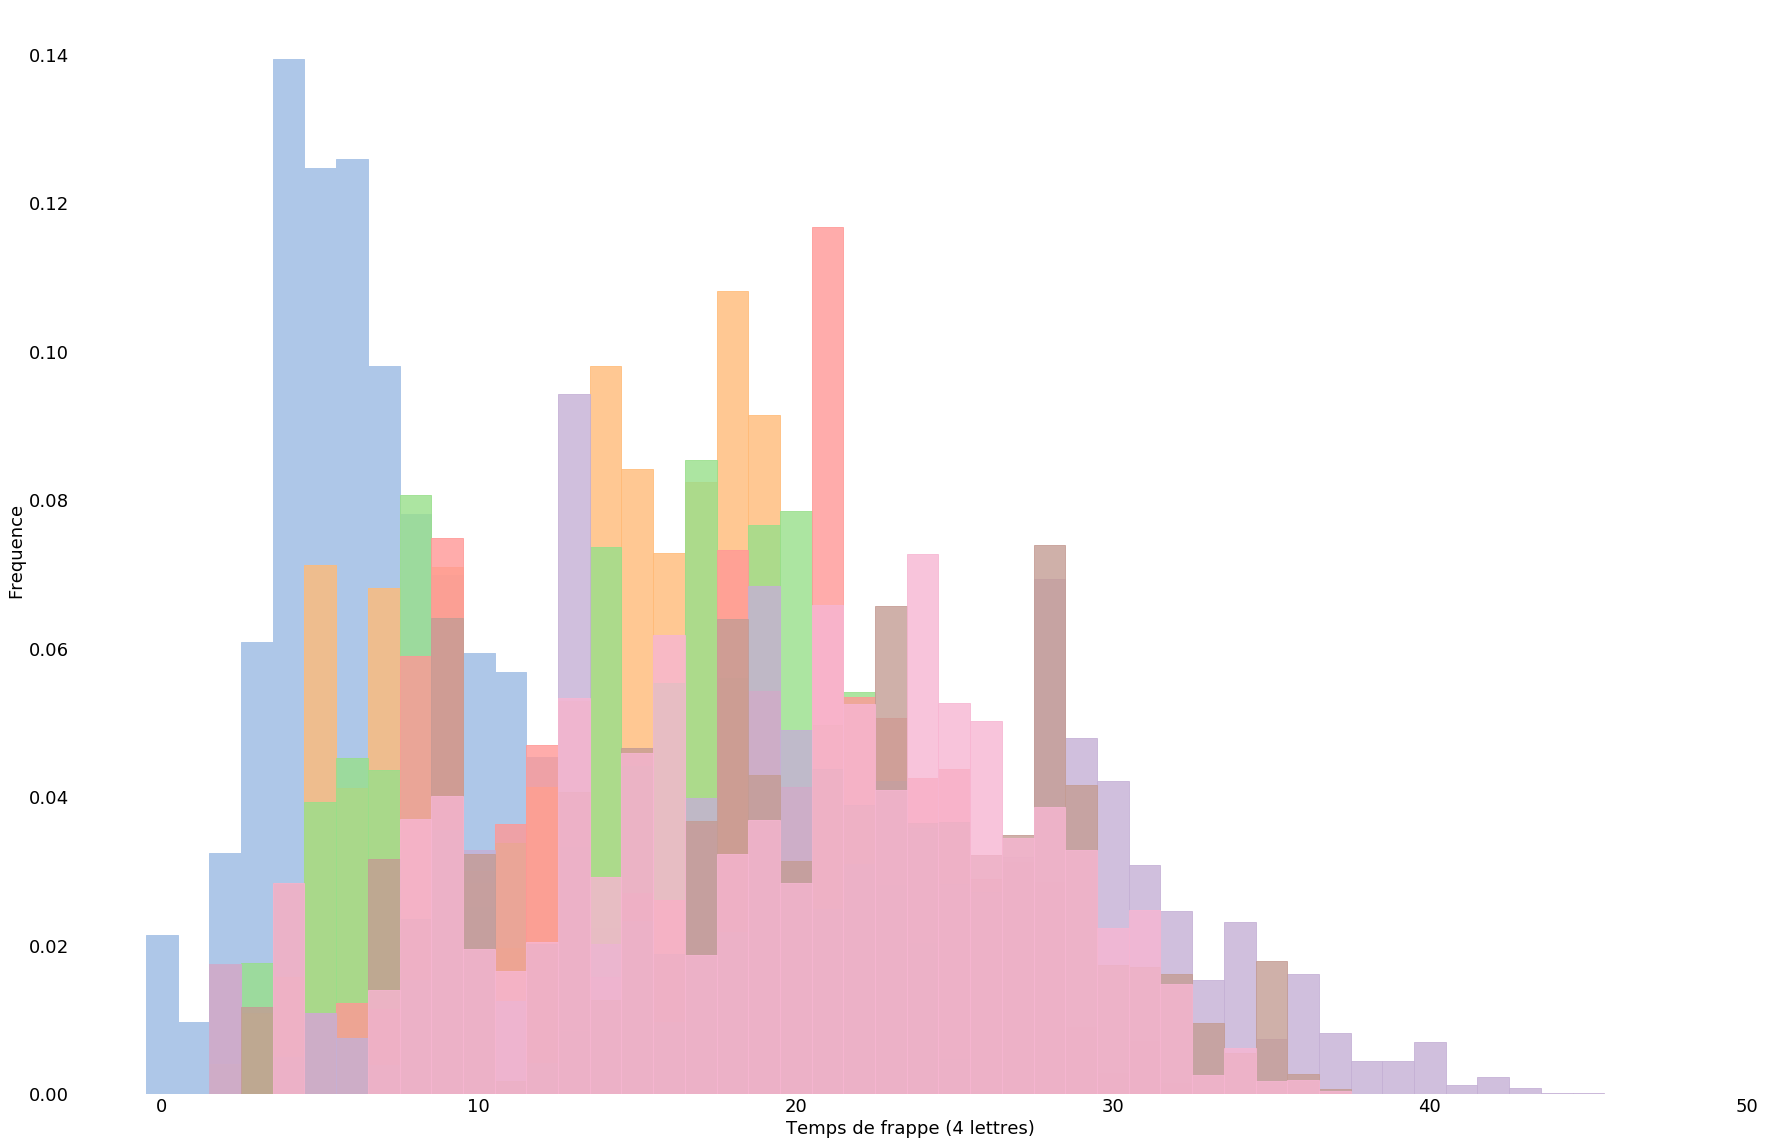

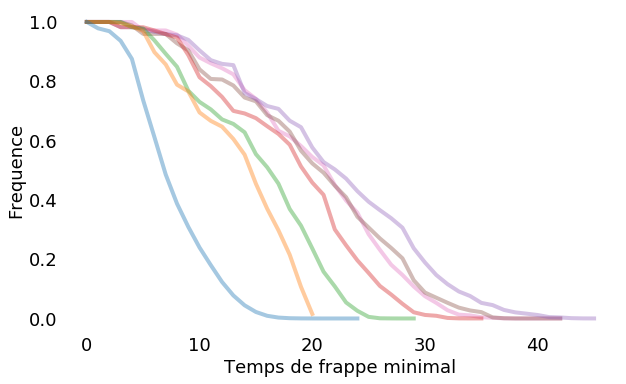

In [35]:
i=0
plt.figure(figsize=(30,20))
for frequencies in methods:
    i+=2
    pos = np.arange(len(frequencies))
    width = 1.0     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(pos)

    if i == 2:
        a = 1
    else:
        a = 0.8
    plt.bar(pos, frequencies, width, color=tableau20[i - 1], edgecolor=tableau20[i - 1], alpha=a)
    

ind = [0, 10, 20, 30, 40, 50]
plt.xticks(ind, ind)

ax.set_xlabel("Temps de frappe (4 lettres)")
ax.set_ylabel("Frequence")
ax.set_title("")

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

cumul = copy.deepcopy(methods)
for frequencies in cumul:
    for i in range(len(frequencies) - 2, -1, -1):
        frequencies[i] += frequencies[i + 1]

plt.figure(figsize=(10,6))

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

for k in range(len(cumul) - 1, -1, -1):
    frequencies = cumul[k]
    i -= 2
    pos = np.arange(len(frequencies))
    width = 1.0    # gives histogram aspect to the bar diagram
    if k == 0:
        a = 1
    else:
        a = 1
    plt.plot(pos, frequencies, linewidth = 4, alpha = 0.4, color = tableau20[2 * k])

ax.set_xlabel("Temps de frappe minimal")
ax.set_ylabel("Frequence")
ax.set_title("")

plt.show()

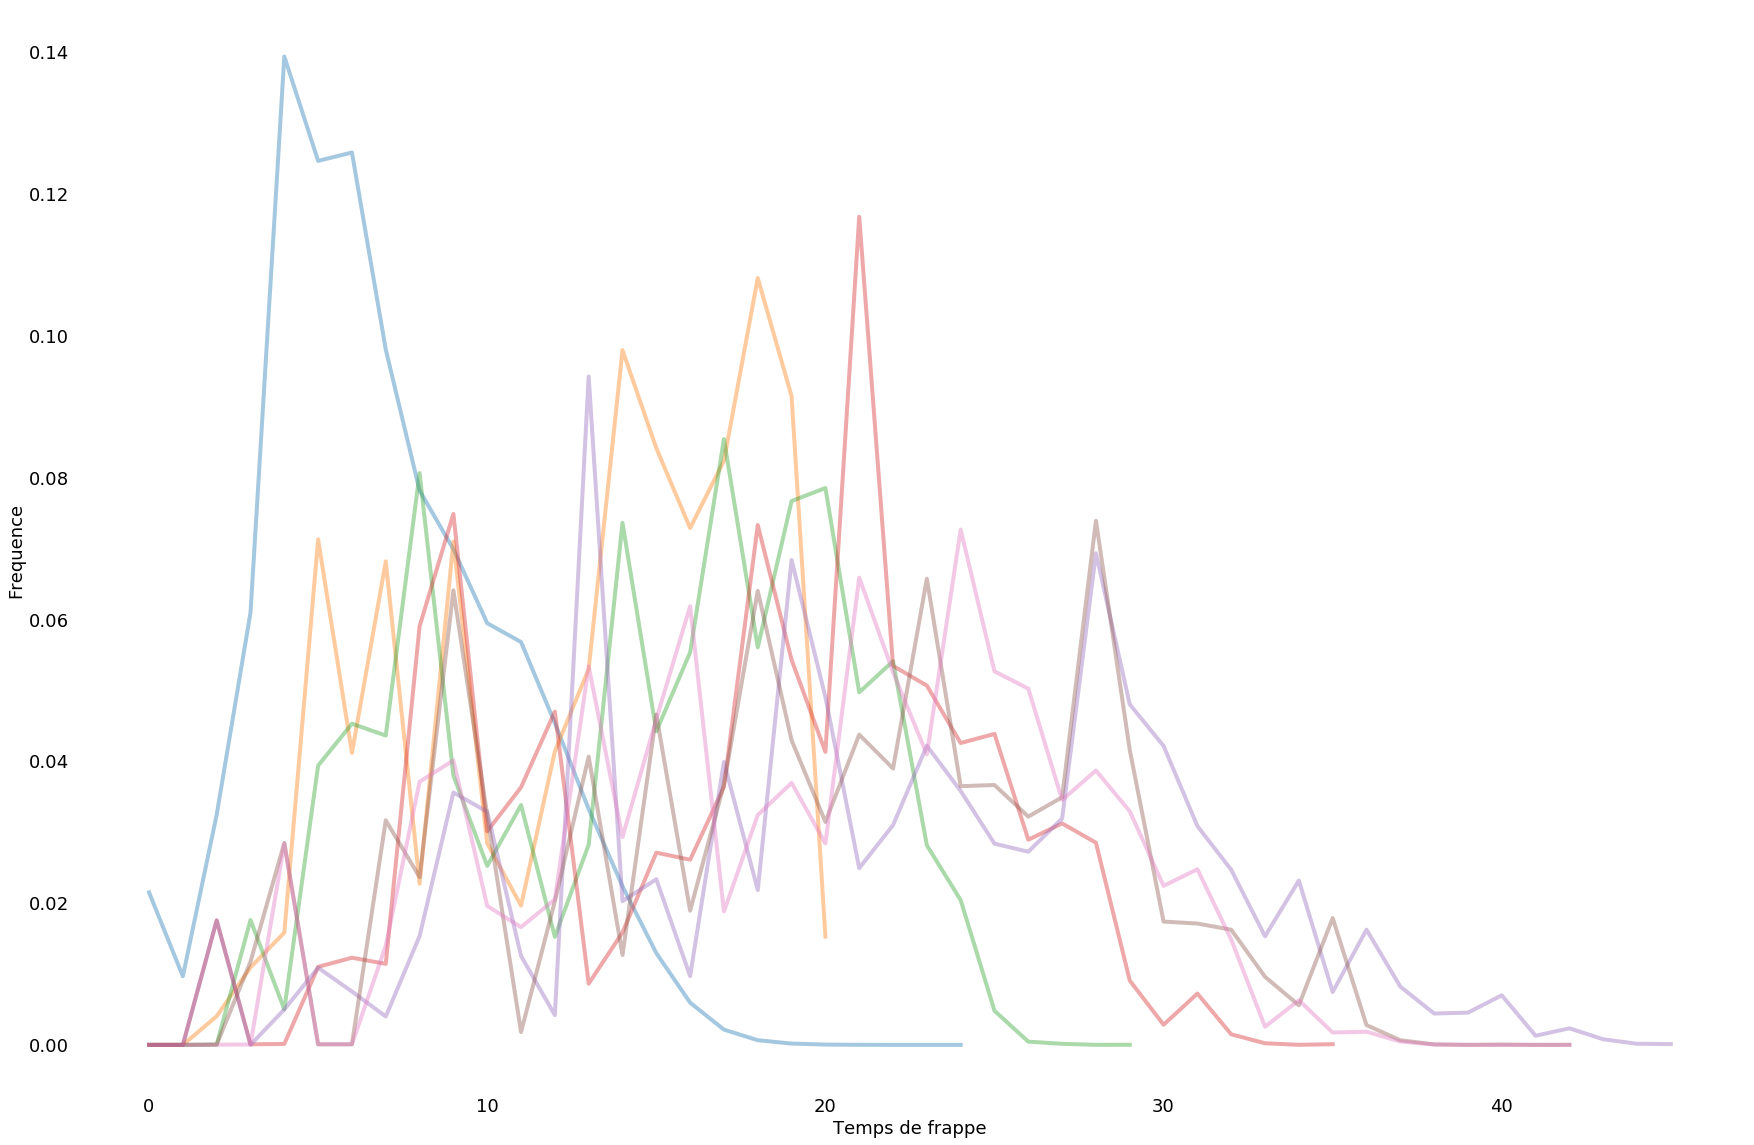

In [13]:
plt.figure(figsize=(30,20))
for frequencies in methods:
    plt.plot([i for i in range(len(frequencies))], frequencies, linewidth = 4, alpha = 0.4)

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)
    
ax.set_xlabel("Temps de frappe")
ax.set_ylabel("Frequence")
ax.set_title("")

ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

In [14]:
def mean(l):
    s = 0
    for i in range(len(l)):
        s += i * l[i]
    return s

def variance(l):
    v = 0
    m = mean(l)
    for i in range(len(l)):
        v += l[i] * (i - m) * (i - m)
    return v

[6.987496464821413, 12.883689322885548, 14.587623184698936, 17.550157258960255, 21.437558044940594, 19.626358894069718, 19.636950126652074]
[11.94048879677727, 23.120699157413746, 32.74915831304818, 44.98809412599938, 74.88537181173855, 63.432365098119185, 52.368669695305925]
[3.4555012366916134, 4.8083988143054173, 5.722688032126876, 6.7073164623416552, 8.6536334456538277, 7.9644438034378258, 7.2366200463549228]


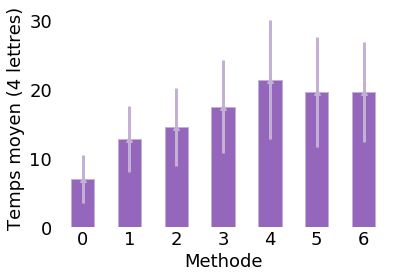

In [15]:
means = [0] * len(methods)
for i in range(len(methods)):
    for j in range(len(methods[i])):
        means[i] += j * methods[i][j]
print means

variances = [0] * len(methods)
for i in range(len(methods)):
    variances[i] = variance(methods[i])
print variances

ectype = variances[:]
for i in range(len(ectype)):
    ectype[i] = sqrt(ectype[i])
print ectype

pos = np.arange(len(means))
width = 0.5     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(pos)

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

ax.set_xlabel("Methode")
ax.set_ylabel("Temps moyen (4 lettres)")
ax.set_title("")

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.bar(pos + width / 2, means, width, color=tableau20[8], edgecolor=tableau20[9])
plt.errorbar(pos + 0.25, means, ectype, linestyle='None', elinewidth = 3, marker='^', color=tableau20[9])

plt.show()